### Xanthohumol optimizations for the iECD_1391 model

In [1]:
import cobra
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems import GOUProblem
from mewpy.problems import ROUProblem
from mewpy.problems import GKOProblem
from mewpy.problems import RKOProblem
from mewpy.simulation import SimulationMethod, get_simulator
import warnings
from mewpy.optimization import EA

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-11


In [2]:
model = cobra.io.read_sbml_model('iECD_1391_new.xml')

In [3]:
BIOMASS_ID = 'BIOMASS_Ec_iJO1366_core_53p95M'
PRODUCT_ID = 'xanthohumol_e'
O2 = 'EX_o2_e'
GLC = 'EX_glc__D_e'
envcond = {GLC: (-10.0, 100000.0), O2: (-1000,1000), BIOMASS_ID:(0.1,1000)}
model.objective = 'xanthohumol_e'
model.objective.expression

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.pFBA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

In [4]:
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method='pFBA')
print(res)

objective: 687.9425445500299
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-10.0, 100000.0)), ('EX_o2_e', (-1000, 1000)), ('BIOMASS_Ec_iJO1366_core_53p95M', (0.1, 1000))])
Method:pFBA


In [5]:
problem = GOUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem2 = ROUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem3 = GKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem4 = RKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)

Running NSGAII


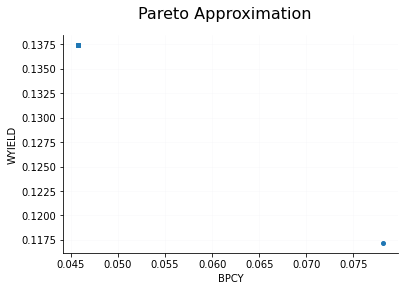

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.078122  0.044975  0.028451  0.022513|  0.000000  0.137412  0.132683  0.081951  0.065021|
    200|  0.044428  0.120585  0.045804  0.048067  0.010087|  0.027592  0.137412  0.137412  0.134018  0.016162|
    300|  0.045804  0.120585  0.045804  0.052943  0.018569|  0.027592  0.137412  0.137412  0.132465  0.015225|
    400|  0.045804  0.120585  0.045804  0.061365  0.025089|  0.090425  0.137412  0.137412  0.128820  0.015010|
    500|  0.045804  0.120585  0.045804  0.066884  0.026718|  0.090439  0.137412  0.137412  0.126140  0.015980|
    600|  0.045804  0.120585  0.045804  0.058982  0.024832|  0.090439  0.137412  0.137412  0.130053  0.014929|
    700|  0.045804  0.120585  0.045804  0.054970  0.021816|  0.090439  0.137412  0.137412  0.132245  0.013110|
    800|  0.045804  0.120585  0.045804  0.062286  0.026906|  0.090439  0.137412  0.137412  0.128175  0.016286|
 

In [6]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea = EA(problem, max_generations= 50, mp = True, visualizer = True)
final_pop = ea.run()

In [7]:
df = ea.dataframe()
df.to_csv('GOU_50gen.csv')
print(df)

                                         Modification  Size      BPCY  \
0                                                  {}     0  0.045804   
1                                    {'ECD_00703': 4}     1  0.120585   
2   {'ECD_03958': 0.0625, 'ECD_01633': 2, 'ECD_007...     6  0.081173   
3   {'ECD_03236': 0, 'ECD_03958': 0.0625, 'ECD_016...     6  0.081173   
4   {'ECD_03236': 0, 'ECD_03958': 0.0625, 'ECD_016...     6  0.081173   
5   {'ECD_03236': 0, 'ECD_03958': 0.0625, 'ECD_016...     6  0.081173   
6   {'ECD_03236': 0, 'ECD_01633': 2, 'ECD_00703': ...     6  0.081173   
7   {'ECD_03236': 0, 'ECD_03958': 0.0625, 'ECD_007...     6  0.081173   
8   {'ECD_03236': 0, 'ECD_03958': 0.0625, 'ECD_016...     6  0.081173   
9   {'ECD_01633': 2, 'xapA': 0.5, 'ECD_00703': 2, ...     6  0.081173   
10  {'ECD_03236': 0, 'ECD_01633': 2, 'xapA': 0.5, ...     6  0.081173   
11  {'ECD_03236': 0, 'ECD_01633': 2, 'xapA': 0.5, ...     6  0.081173   
12  {'ECD_03236': 0, 'ECD_01633': 2, 'xapA': 0.5, .

Building modification target list.
Running NSGAII


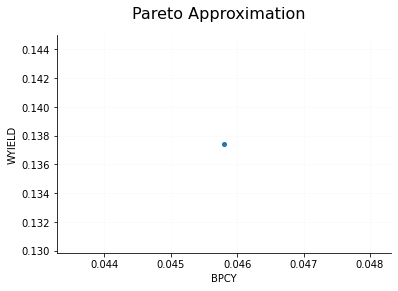

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.045804  0.045371  0.028374  0.021173|  0.000000  0.137413  0.136113  0.085123  0.063518|
    200|  0.045704  0.045804  0.045804  0.045800  0.000014|  0.137111  0.137413  0.137412  0.137400  0.000043|
    300|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137413  0.137412  0.137412  0.000000|
    400|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137413  0.137412  0.137412  0.000000|
    500|  0.045804  0.120585  0.045804  0.046552  0.007441|  0.090439  0.137413  0.137412  0.136942  0.004674|
    600|  0.045804  0.120585  0.045804  0.046552  0.007441|  0.090439  0.137413  0.137412  0.136943  0.004674|
    700|  0.045804  0.120585  0.045804  0.049543  0.016298|  0.090439  0.137413  0.137413  0.135065  0.010238|
    800|  0.045804  0.120585  0.045804  0.055132  0.024425|  0.090439  0.137413  0.137413  0.131620  0.015287|
 

In [8]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea2 = EA(problem2, max_generations= 50, mp = True, visualizer = True)
final_pop2 = ea2.run()

In [9]:
df2 = ea2.dataframe()
df2.to_csv('ROU_50gen.csv')
print(df2)

         Modification  Size      BPCY    WYIELD
0  {'EX_mobd_e': 0.5}     1  0.000000  0.000000
1        {'MNtex': 4}     1  0.120585  0.090439


  0%|          | 0/1335 [00:00<?, ?it/s]

Building modification target list.
Computing essential genes.


100%|██████████| 1335/1335 [02:26<00:00,  9.14it/s]


Running NSGAII


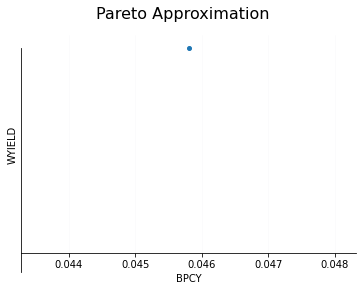

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.022396  0.045804  0.045804  0.044795  0.003561|  0.067189  0.137412  0.137412  0.134384  0.010684|
    200|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    300|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    400|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    500|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    600|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    700|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    800|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
 

In [10]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea3 = EA(problem3, max_generations= 50, mp = True, visualizer = True)
final_pop3 = ea3.run()

In [11]:
df3 = ea3.dataframe()
df3.to_csv('GKO_50gen.csv')
print(df3)

  Modification  Size      BPCY    WYIELD
0           {}     0  0.045804  0.137412


  0%|          | 0/2758 [00:00<?, ?it/s]

Building modification target list.
Computing essential reactions


100%|██████████| 2758/2758 [03:50<00:00, 11.96it/s]


Running NSGAII


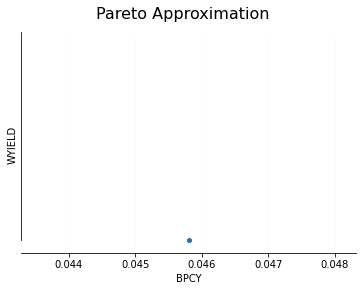

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.022396  0.045804  0.045804  0.045413  0.002466|  0.067189  0.137412  0.137412  0.136238  0.007397|
    200|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    300|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    400|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    500|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    600|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    700|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
    800|  0.045804  0.045804  0.045804  0.045804  0.000000|  0.137412  0.137412  0.137412  0.137412  0.000000|
 

In [12]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea4 = EA(problem4, max_generations= 50, mp = True, visualizer = True)
final_pop4 = ea4.run()

In [13]:
df4 = ea4.dataframe()
df4.to_csv('RKO_50gen.csv')
print(df4)

  Modification  Size      BPCY    WYIELD
0  {'ATPM': 0}     1  0.046462  0.139385
